In [14]:
from google.colab import files
uploaded = files.upload()


Saving sidik_jari1.jpg to sidik_jari1.jpg
Saving sidik_jari2.jpg to sidik_jari2.jpg
Saving sidik_jari3.jpg to sidik_jari3.jpg
Saving sidik_jari4.jpg to sidik_jari4.jpg
Saving sidik_jari5.jpg to sidik_jari5.jpg
Saving sidik_jari6.jpg to sidik_jari6.jpg
Saving sidik_jari7.jpg to sidik_jari7.jpg
Saving sidik_jari8.jpg to sidik_jari8.jpg
Saving sidik_jari9.jpg to sidik_jari9.jpg
Saving sidik_jari10.jpg to sidik_jari10.jpg


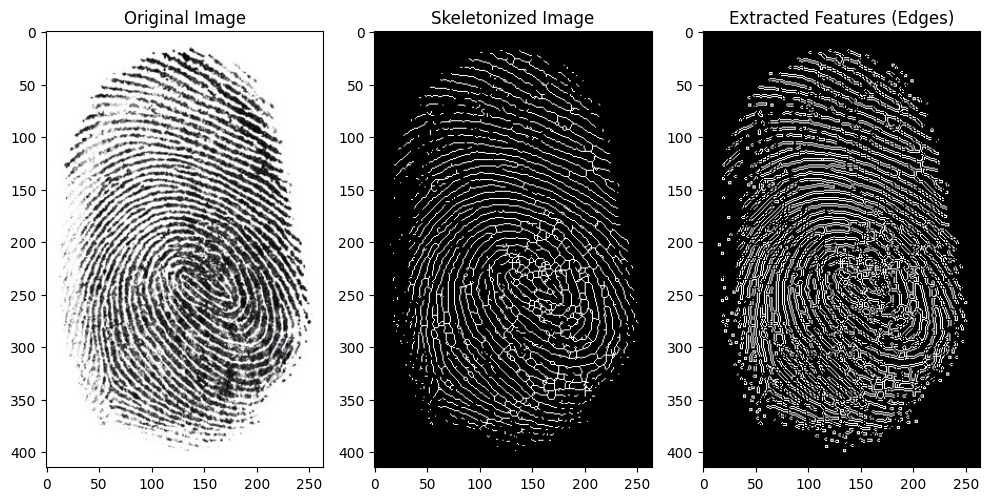

In [23]:
import cv2
import numpy as np
from skimage.morphology import skeletonize
import matplotlib.pyplot as plt

def preprocess_fingerprint(image_path):
    # Membaca citra dari file
    image = cv2.imread(image_path)

    # Konversi ke grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Binerisasi gambar
    _, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Skeletonize image
    skeleton = skeletonize(binary // 255)

    return skeleton

def extract_features(skeleton):
    # Ekstraksi fitur (misalnya titik minutiae) - untuk contoh, kita akan gunakan deteksi tepi
    edges = cv2.Canny((skeleton * 255).astype(np.uint8), 100, 200)
    return edges

# Preprocess image
skeleton = preprocess_fingerprint('sidik_jari10.jpg')

# Ekstraksi fitur
features = extract_features(skeleton)

# Menampilkan hasil
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(cv2.imread('sidik_jari10.jpg'), cv2.COLOR_BGR2RGB))

plt.subplot(1, 3, 2)
plt.title('Skeletonized Image')
plt.imshow(skeleton, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Extracted Features (Edges)')
plt.imshow(features, cmap='gray')

plt.tight_layout()
plt.show()


Sidik jari cocok


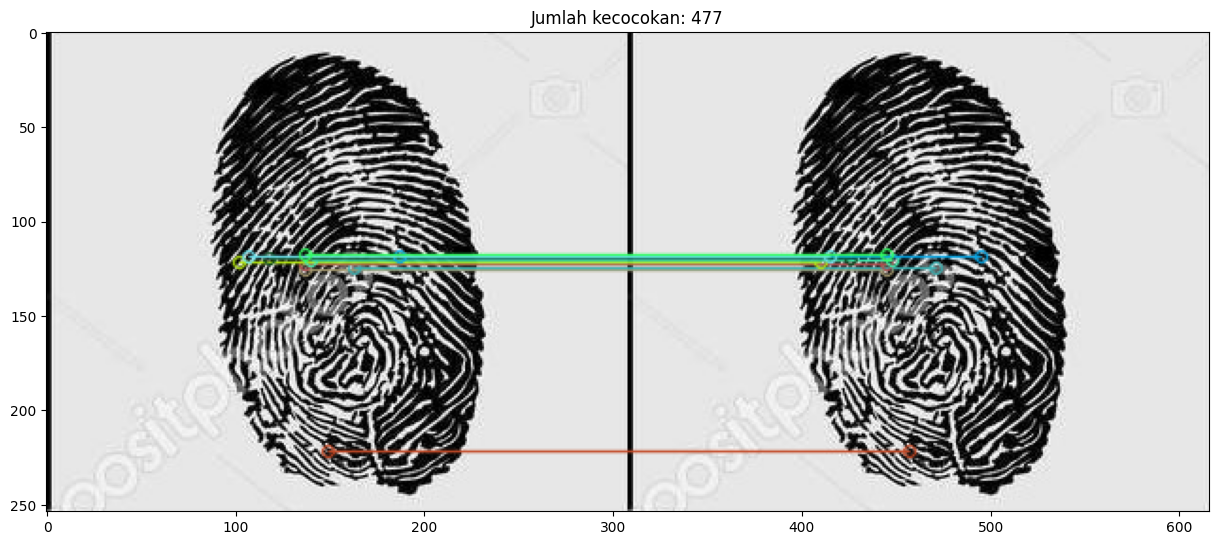

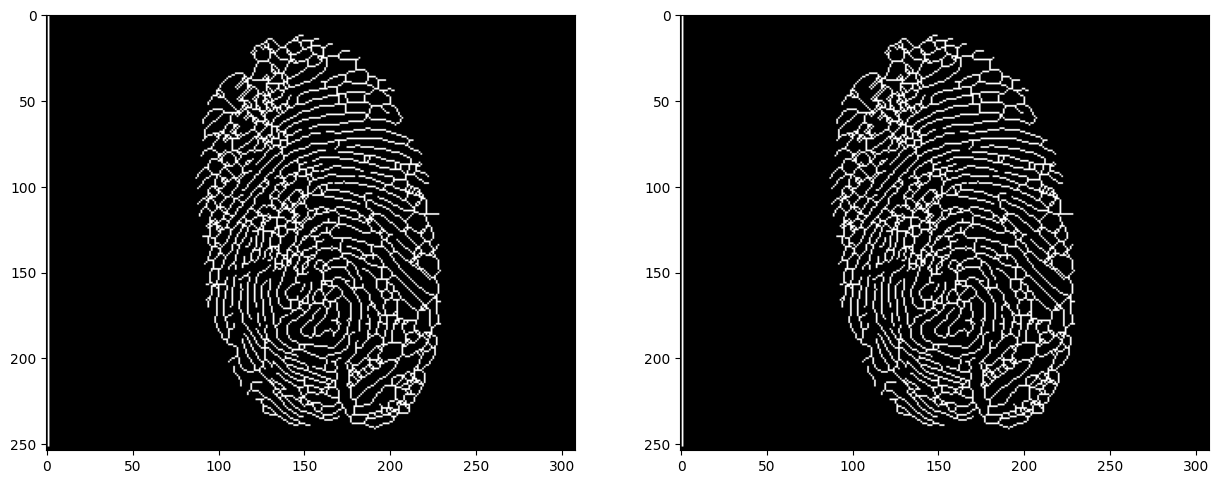

In [114]:
import cv2
import numpy as np
from skimage.morphology import skeletonize
import matplotlib.pyplot as plt

def preprocess_fingerprint(image_path):
    # Membaca citra dari file
    image = cv2.imread(image_path)

    # Konversi ke grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Binerisasi gambar
    _, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Skeletonize image
    skeleton = skeletonize(binary // 255)

    return skeleton

def extract_and_match_features(image1_path, image2_path):
    # Inisialisasi ORB
    orb = cv2.ORB_create()

    # Membaca dan memproses gambar pertama
    image1 = cv2.imread(image1_path, cv2.IMREAD_GRAYSCALE)
    skeleton1 = preprocess_fingerprint(image1_path)
    keypoints1, descriptors1 = orb.detectAndCompute((skeleton1 * 255).astype(np.uint8), None)

    # Membaca dan memproses gambar kedua
    image2 = cv2.imread(image2_path, cv2.IMREAD_GRAYSCALE)
    skeleton2 = preprocess_fingerprint(image2_path)
    keypoints2, descriptors2 = orb.detectAndCompute((skeleton2 * 255).astype(np.uint8), None)

    # Pencocokan fitur menggunakan BFMatcher
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(descriptors1, descriptors2)
    matches = sorted(matches, key=lambda x: x.distance)

    # Gambar hasil pencocokan
    result_image = cv2.drawMatches(image1, keypoints1, image2, keypoints2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    return result_image, matches

# Memproses dan mencocokkan sidik jari
result_image, matches = extract_and_match_features('sidik_jari1.jpg', 'sidik_jari2.jpg')

# Menampilkan hasil
plt.figure(figsize=(15, 10))
plt.title(f'Jumlah kecocokan: {len(matches)}')
if len(matches) < 250:
    print("Sidik jari tidak cocok")
else:
    print("Sidik jari cocok")
plt.imshow(result_image)
plt.show()

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(skeleton1, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(skeleton2, cmap='gray')
plt.show()